# Lab01 - Phân tích khám phá dữ liệu (Exploratory Data Analysis)

Trong notebook này, tôi thực hiện **thống kê mô tả** trên bộ dữ liệu rượu vang đỏ (Wine Quality Dataset).
Các bước bao gồm:
- Kiểm tra dữ liệu: missing values, duplicates
- Tính các chỉ số thống kê mô tả: mean, median, mode, std, variance, range, IQR
- Trực quan hóa: Histogram, Boxplot
- Thống kê mô tả nâng cao: Skewness, Kurtosis
- Phân tích tương quan giữa các biến
- Đưa ra kết luận

## import và đọc dữ liệu

In [37]:
import pandas as pd

wine = pd.read_csv("winequality-red.csv", sep=",")
print(wine.head())
print(wine.columns)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [38]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


## Kiểm tra thông tin dữ liệu

- Tất cả các cột đều thuộc kiểu **số thực (float64)**, riêng `quality` là **số nguyên (int64)**.  
- Số dòng = 1599, số cột = 12.  
- Không có giá trị null (missing values).  
- Như vậy dữ liệu sạch, có thể tiến hành thống kê mô tả mà không cần xử lý thiếu dữ liệu.

## Thống kê mô tả cơ bản

- Bảng thống kê cung cấp các chỉ số quan trọng:
  - **mean**: giá trị trung bình của từng biến.  
  - **std**: độ lệch chuẩn, cho thấy mức độ phân tán quanh trung bình.  
  - **min, max**: giá trị nhỏ nhất và lớn nhất.  
  - **25%, 50%, 75%**: các phân vị (quartiles), trong đó **50% = median**.  

- Quan sát một số điểm đáng chú ý:
  - `alcohol` có mean ≈ 10.43 và median ≈ 10.20 → dữ liệu hơi lệch phải.  
  - `residual sugar` có min rất thấp nhưng max khá cao → dễ có outliers.  
  - `quality` dao động từ 3 đến 8, trung bình ≈ 5.64 → phần lớn rượu có chất lượng trung bình.  


In [57]:
print(wine.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

## Trực quan hóa dữ liệu

- **Histogram (alcohol):**
  - Phân bố không đối xứng hoàn toàn, hơi lệch phải (skewed right).  
  - Phần lớn mẫu rượu tập trung quanh mức 9–11% alcohol.  
  - Một số ít mẫu có độ cồn cao hơn kéo phân bố lệch sang phải.  

- **Boxplot (residual sugar):**
  - Có nhiều điểm nằm ngoài râu hộp → xuất hiện outliers.  
  - Phần lớn mẫu rượu vang đỏ có lượng đường dư thấp, nhưng một vài mẫu có lượng đường cao bất thường.  


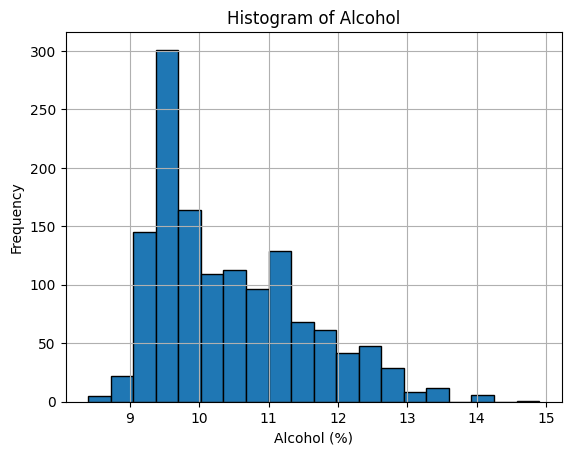

In [59]:
import matplotlib.pyplot as plt

# Histogram alcohol
wine["alcohol"].hist(bins=20, edgecolor="black")
plt.title("Histogram of Alcohol")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frequency")
plt.show()

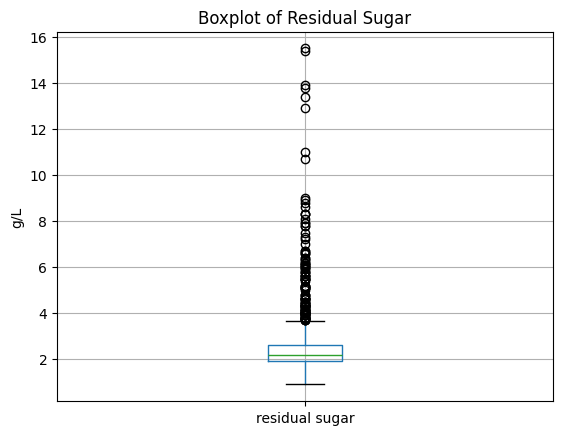

In [60]:
# Boxplot residual sugar
wine.boxplot(column="residual sugar")
plt.title("Boxplot of Residual Sugar")
plt.ylabel("g/L")
plt.show()


## Nhận xét về Skewness với kurtosis

- **Skewness (độ lệch):**
  - `alcohol` có skewness ≈ 0.86 → phân bố lệch phải nhẹ.  
  - Một số biến khác như `volatile acidity` lệch trái (skewness âm).  

- **Kurtosis (độ nhọn):**
  - `residual sugar` có kurtosis rất lớn (≈ 29) → phân bố nhọn, nhiều outliers.  
  - Các biến khác có kurtosis gần 0 → phân bố gần chuẩn hơn.  


In [64]:
# Skewness và Kurtosis cho các cột số
print("Skewness:\n", wine.skew(numeric_only=True))
print("\nKurtosis:\n", wine.kurt(numeric_only=True))


Skewness:
 fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

Kurtosis:
 fixed acidity            1.049673
volatile acidity         1.249243
citric acid             -0.788921
residual sugar          29.364592
chlorides               38.624653
free sulfur dioxide      1.892691
total sulfur dioxide     4.042257
density                  0.830659
pH                       0.879790
sulphates               11.102282
alcohol                  0.159739
quality                  0.340256
dtype: float64


## Thống kê Range – IQR – Mode

- **Alcohol:**
  - Range ≈ 6.5 → độ cồn trải rộng từ khoảng 8% đến 14.5%.  
  - IQR ≈ 1.6 → 50% rượu điển hình chỉ khác nhau 1.6% nồng độ cồn, chứng tỏ phần lớn dữ liệu tập trung.  
  - Mode = 9.5 → giá trị độ cồn phổ biến nhất trong tập dữ liệu.  

- **Residual sugar:**
  - Range lớn → có sự khác biệt rất lớn giữa mẫu ít đường và nhiều đường.  
  - IQR nhỏ → đa số rượu vang đỏ có đường dư thấp.  
  - Có nhiều outliers ở phía giá trị cao, khớp với quan sát từ boxplot.  


In [65]:
range_alcohol = wine["alcohol"].max() - wine["alcohol"].min()
print("Range (alcohol):", range_alcohol)


Range (alcohol): 6.5


In [66]:
Q1 = wine["alcohol"].quantile(0.25)
Q3 = wine["alcohol"].quantile(0.75)
IQR = Q3 - Q1
print("IQR (alcohol):", IQR)


IQR (alcohol): 1.5999999999999996


In [67]:
mode_alcohol = wine["alcohol"].mode()[0]
print("Mode (alcohol):", mode_alcohol)


Mode (alcohol): 9.5


## Kết luận

- Bộ dữ liệu rượu vang đỏ gồm 1599 mẫu, đầy đủ, không có missing values và không có trùng lặp.  
- Các thước đo thống kê mô tả cho thấy:
  - Alcohol có phân bố lệch phải nhẹ (skewness > 0), trung bình ~10.4%. Đây là biến có ảnh hưởng rõ đến chất lượng rượu.  
  - Residual sugar có nhiều outliers và kurtosis cao, tuy nhiên không ảnh hưởng đáng kể đến quality.  
  - Quality chủ yếu nằm trong khoảng 5–6, ít mẫu rượu chất lượng cao (7–8).  
- Biểu đồ histogram và boxplot minh họa trực quan phân bố và sự xuất hiện outliers.  
- Các chỉ số nâng cao (skewness, kurtosis) giúp bổ sung thông tin về dạng phân bố và phát hiện giá trị bất thường.  


